## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [35]:
df = pd.read_csv("QueryResults.csv", names=["Date", "Tag", "Posts"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [8]:
df.head()
df.tail()

,Date,Tag,Posts
2407,2023-01-01 00:00:00,php,3594
2408,2023-01-01 00:00:00,python,19542
2409,2023-01-01 00:00:00,r,3875
2410,2023-01-01 00:00:00,ruby,384
2411,2023-01-01 00:00:00,swift,1591


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [9]:
df.shape

(2412, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [10]:
df.count()

Date     2412
Tag      2412
Posts    2412
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [12]:
df.groupby("Tag")["Posts"].sum()

Tag
assembly        42132
c              392360
c#            1578650
c++            787150
delphi          50488
go              67211
java          1884157
javascript    2469270
perl            67452
php           1453834
python        2096015
r              479089
ruby           227154
swift          323840
Name: Posts, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [36]:
df.groupby("Tag").count()

,Date,Posts
Tag,,
assembly,174,174
c,174,174
c#,175,175
c++,174,174
delphi,174,174
go,159,159
java,174,174
javascript,174,174
perl,174,174


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [37]:
# df["Date"] = df["Date"].apply(lambda date: datetime.strptime(date, "%Y-%m-%d"))
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date     datetime64[ns]
Tag              object
Posts             int64
dtype: object

## Data Manipulation



In [38]:
reshaped_df = df.pivot(index="Date", columns="Tag", values="Posts")
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,723.0,127.0,611.0,507.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [39]:
reshaped_df.shape

(175, 14)

In [40]:
reshaped_df.tail()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2022-09-01,191.0,1646.0,5724.0,3085.0,148.0,841.0,6238.0,14266.0,82.0,3382.0,20178.0,4021.0,474.0,1800.0
2022-10-01,242.0,2010.0,5813.0,3213.0,153.0,741.0,6504.0,14097.0,82.0,3374.0,22077.0,4529.0,436.0,1631.0
2022-11-01,288.0,2189.0,6064.0,3322.0,116.0,753.0,6815.0,14404.0,110.0,3376.0,22958.0,4637.0,466.0,1683.0
2022-12-01,284.0,1870.0,5364.0,2882.0,87.0,636.0,6023.0,12609.0,95.0,2919.0,19434.0,3699.0,397.0,1473.0
2023-01-01,256.0,1589.0,5731.0,2904.0,117.0,795.0,6242.0,13194.0,79.0,3594.0,19542.0,3875.0,384.0,1591.0


In [41]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [42]:
reshaped_df.count()

Tag
assembly      174
c             174
c#            175
c++           174
delphi        174
go            159
java          174
javascript    174
perl          174
php           174
python        174
r             172
ruby          174
swift         166
dtype: int64

In [43]:
reshaped_df.fillna(0, inplace=True)

In [44]:
reshaped_df.count()

Tag
assembly      175
c             175
c#            175
c++           175
delphi        175
go            175
java          175
javascript    175
perl          175
php           175
python        175
r             175
ruby          175
swift         175
dtype: int64

In [45]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [46]:
import matplotlib.pyplot as plt

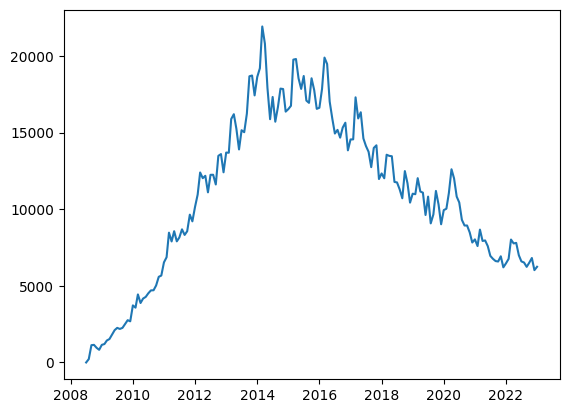

In [51]:
plt.plot(reshaped_df.index, reshaped_df.java)

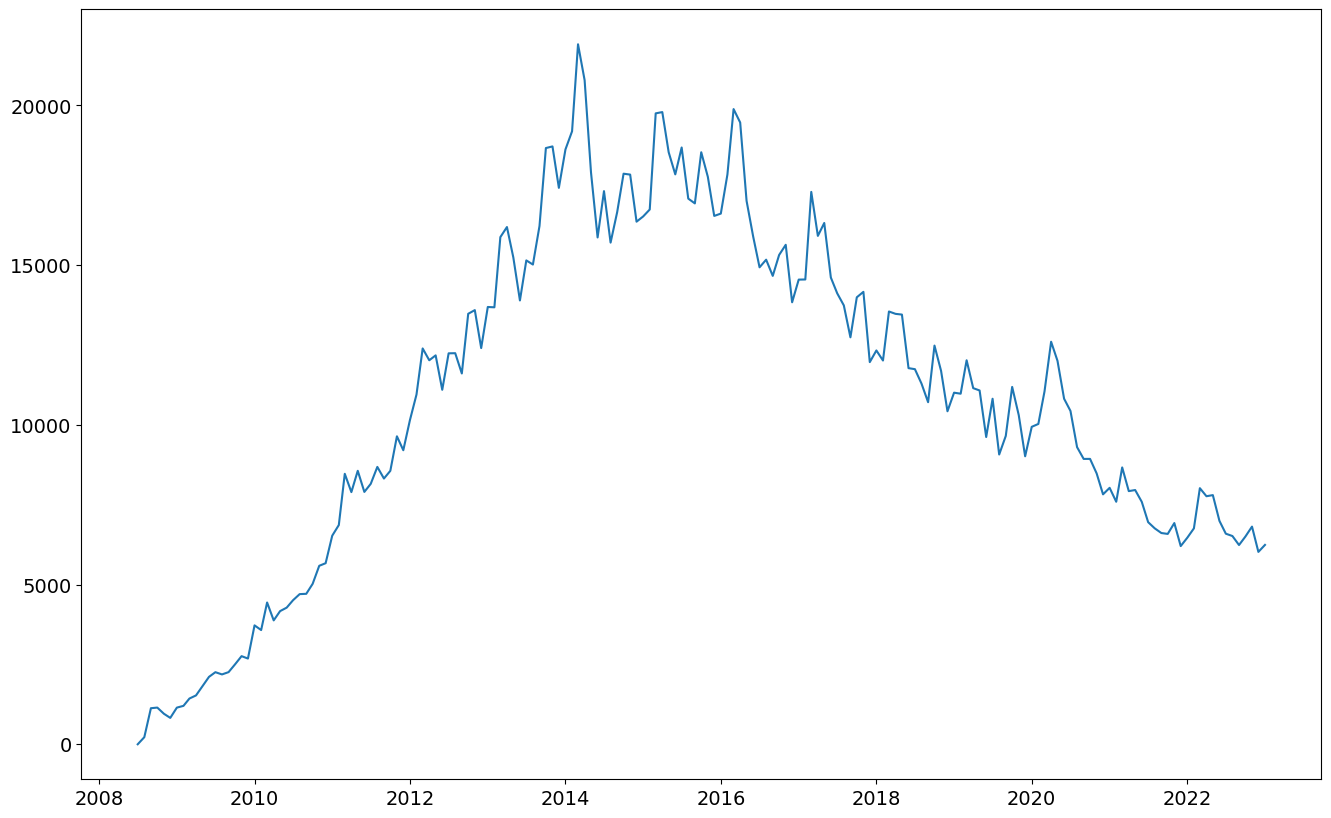

In [52]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

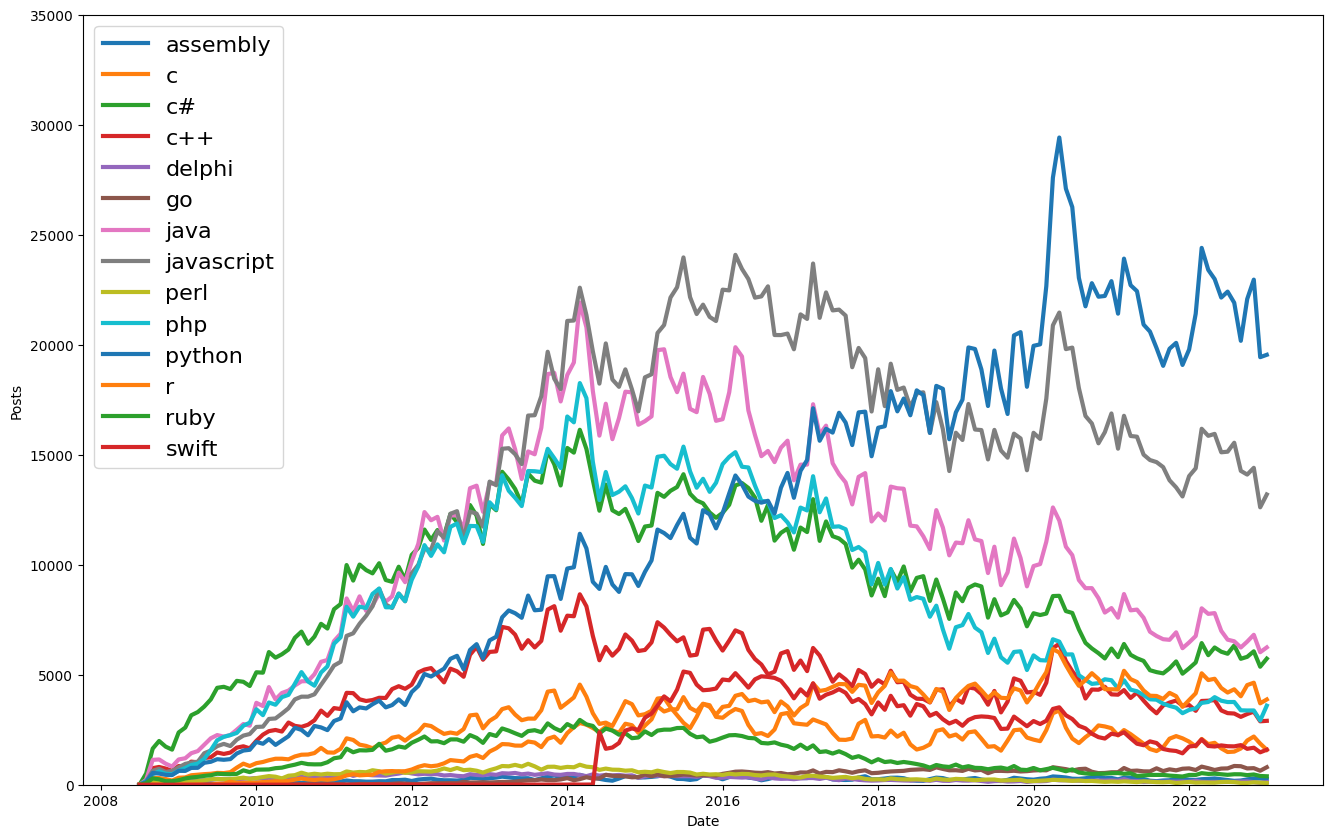

In [63]:
plt.figure(figsize=(16,10))
plt.xlabel("Date")
plt.ylabel("Posts")
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

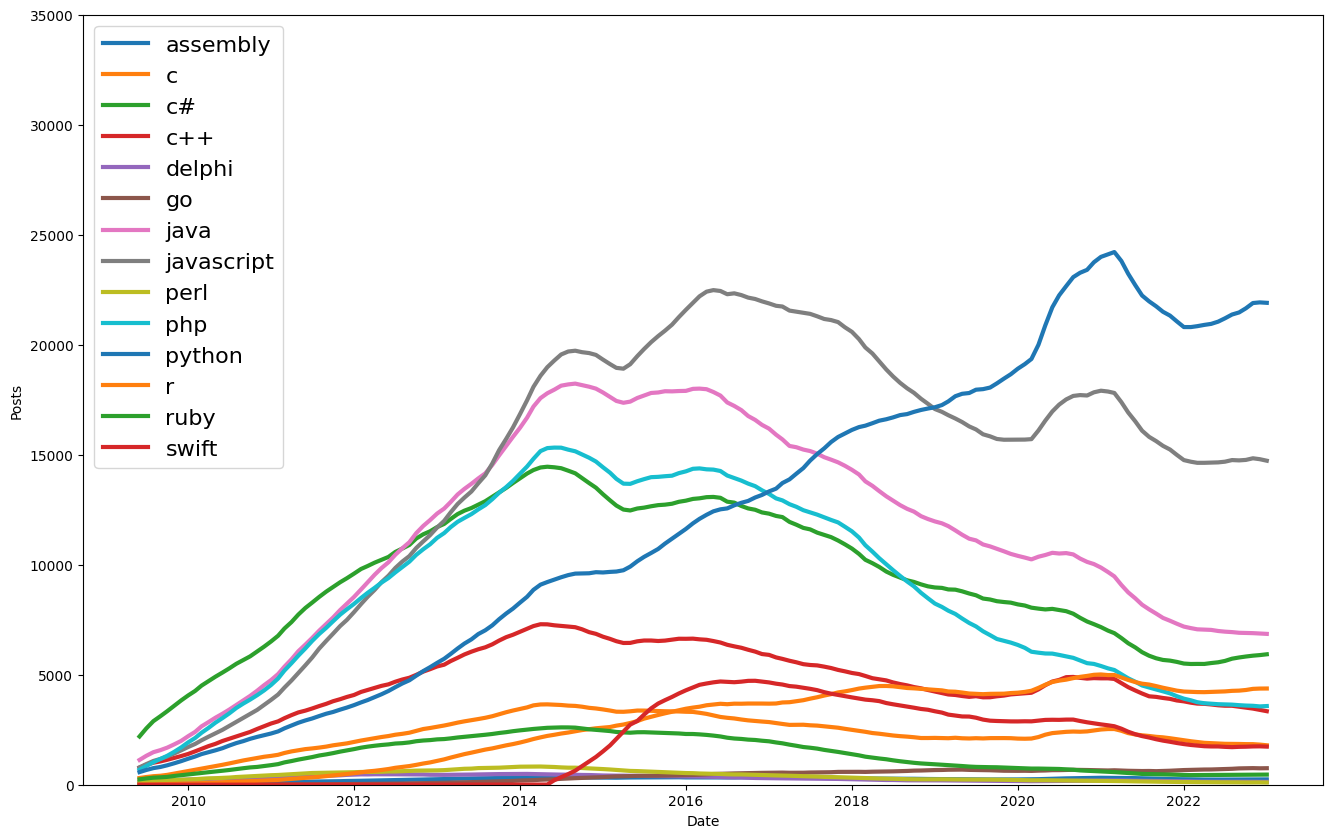

In [65]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xlabel("Date")
plt.ylabel("Posts")
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)
plt.show()